## Executive Summary

**Project Goals**

**Data summary**


**Modules**
- acquire.py: Turns the salary data into a pandas dataframe.
- prepare.py: Takes the salary dataframe and generally clean removing and adding columns. This also holds a scaler and train/validate/test split.
- wrangle.py: Brings both the acquire and prepare functions together.
- explore.py: Holds functions to explore and visualize the data.
- model.py: Contains models and useful plotting tools to visualize model accuracy.

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from acquire import get_salary_data
from prepare import clean_salary_data, min_max_scaler, train_validate_test
from wrangle import wrangle_salary_data, wrangle_explore_salary_data
from explore import salary_heatmap,plot_categorical_and_continuous_vars,plot_hist

import graphviz
from graphviz import Graph

import warnings
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['savefig.dpi'] = 300
%matplotlib inline
sns.set_style("darkgrid")

### Acquire

In [3]:
df = get_salary_data()

In [4]:
# Here's a look at the unclean dataframe
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [5]:
# We can see some null values, and several string values, that will need to be changed/removed.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
totalyearlycompensation,62642.0,216300.373647,138033.746377,10000.0,135000.00,188000.0,264000.00,4980000.0
yearsofexperience,62642.0,7.204135,5.840375,0.0,3.00,6.0,10.00,69.0
yearsatcompany,62642.0,2.702093,3.263656,0.0,0.00,2.0,4.00,69.0
basesalary,62642.0,136687.281297,61369.278057,0.0,108000.00,140000.0,170000.00,1659870.0
stockgrantvalue,62642.0,51486.080733,81874.569391,0.0,0.00,25000.0,65000.00,2800000.0
bonus,62642.0,19334.746588,26781.292040,0.0,1000.00,14000.0,26000.00,1000000.0
cityid,62642.0,9856.201989,6679.104563,0.0,7369.00,7839.0,11521.00,47926.0
dmaid,62640.0,616.097222,289.843390,0.0,506.00,807.0,807.00,881.0
rowNumber,62642.0,41694.723732,24488.865879,1.0,20069.25,42019.0,63021.75,83875.0
Masters_Degree,62642.0,0.245698,0.430504,0.0,0.00,0.0,0.00,1.0


### Prepare
**General Breakdown**

- Breakdown of my prep for my models prepare/clean function:
    - Function creates a dummy variable for title and concats it with the current dataframe.
    - Drops columns that are not useful, or would make the dataset too large to use dummies on.
    - Drops nulls, removes any rows that do not have education documented.
    - Renames some columns for readability.
    - Adds a column for highly experienced.
    
- Breakdown of my prep for my explore prepare/clean fucntion:
    - Creates dummy variable for gender.
    - Removes some columns I do not want insite about or that contain to many nulls.
    - Drops nulls, removes any rows that do not have education documented.
    - Renames some columns for readability.
    - Adds a column for highly experienced.

**The reason that there are two data clean functions is because they contain the same data, although I wanted some deeper exploration into some extra variables that couldnt be translated into my model given the timeframe.**

### Wrangle

In [8]:
df_explore, train_explore, validate_explore, test_explore = wrangle_explore_salary_data()

In [9]:
df, train, validate, test, X_train, X_train_scaled , y_train, X_validate, X_validate_scaled , y_validate, X_test, X_test_scaled , y_test, scaler = wrangle_salary_data()

In [10]:
# A look at our cleaned dataframe
df.head()

,total_earnings,yearsofexperience,yearsatcompany,cityid,masters_degree,bachelors_degree,doctorate_degree,highschool,some_college,title_business_analyst,...,title_mechanical_engineer,title_product_designer,title_product_manager,title_recruiter,title_sales,title_software_engineer,title_software_engineering_manager,title_solution_architect,title_technical_program_manager,highly_experienced
46,320000,4.0,1.0,7419,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
717,239000,4.0,0.0,7300,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3427,125000,1.0,0.0,40303,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5037,170000,0.0,0.0,10182,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5392,332000,1.0,0.0,7351,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore

### Hypotheses
1. Do male tech employees make more money then female
2. Does education level correlated to higher wages
3. Do employees that stay with one company make more money then those that change companies, with the same experience
4. Does location correlate with earnings.
5. Are some job titles only held by those with higher education(masters or doctorate degrees).

<AxesSubplot:title={'center':'Features Correlating with total_earnings'}>

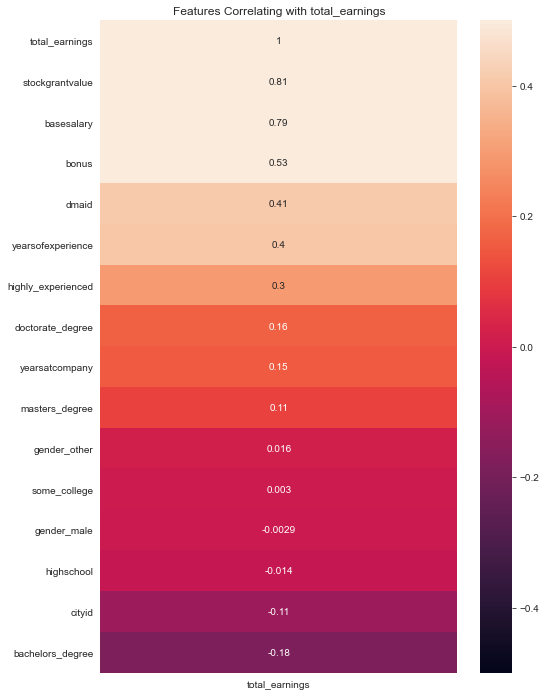

In [11]:
# Lets take a look at a correlation heatmap
salary_heatmap(df_explore,target = 'total_earnings')

**Takeaways**
- Since stockgrantvalue, base salary bonus and dmaid have a relationship with our target variable total earnings they will have to be removed.


- Top 3 positive correlating features:
    - Years of experience
    - having a doctorate degree
    - Years at a company
- Top 3 negative correlating features:
    - Having a bachelors degree
    - location
    - Having highschool as the highest education

### Univariate exploration

In [12]:
col_list = train.columns.to_list()

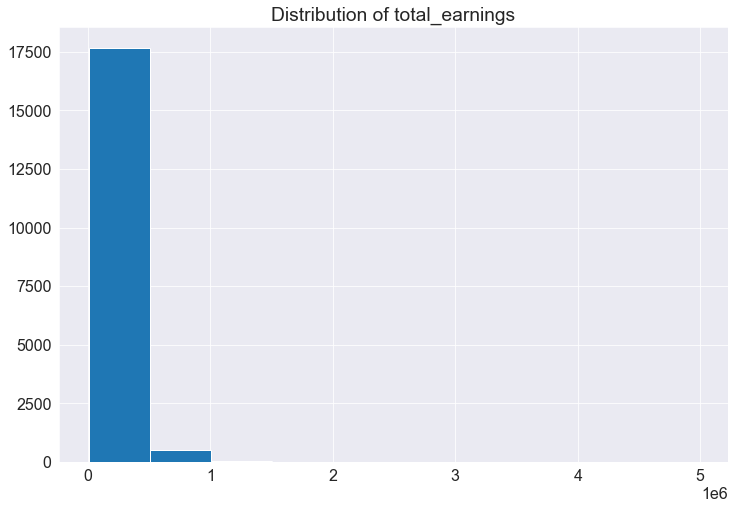

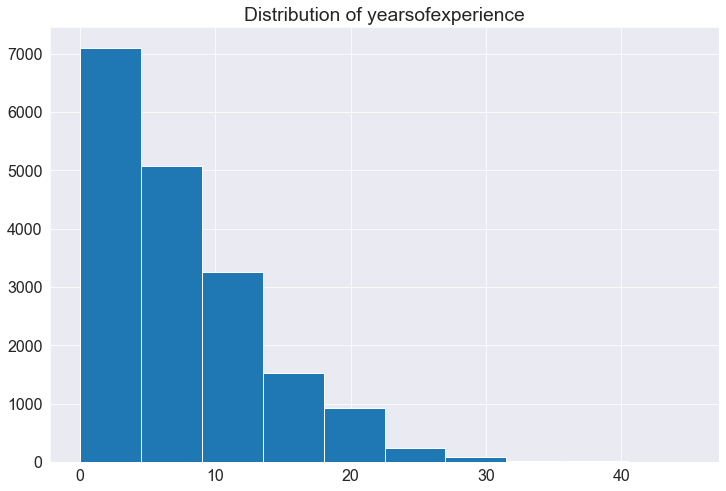

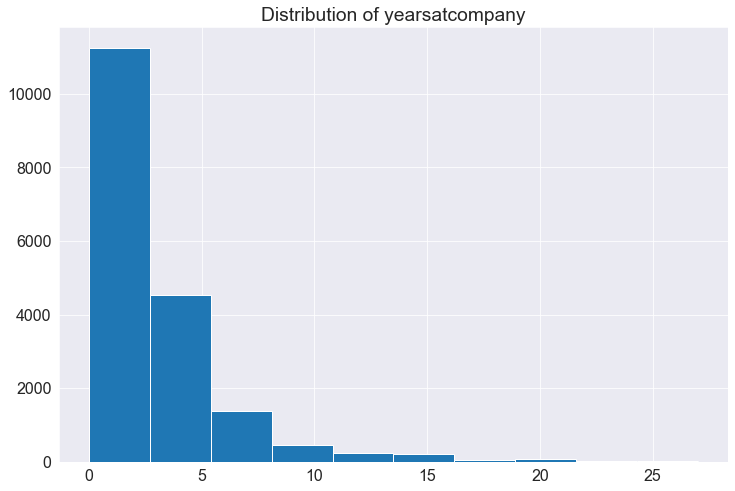

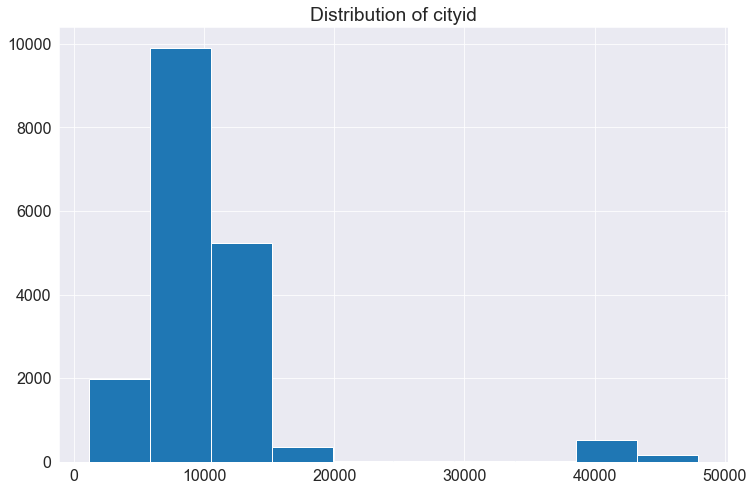

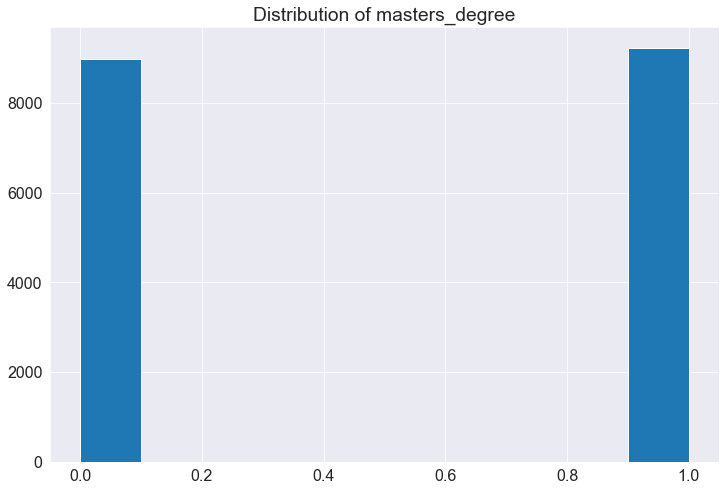

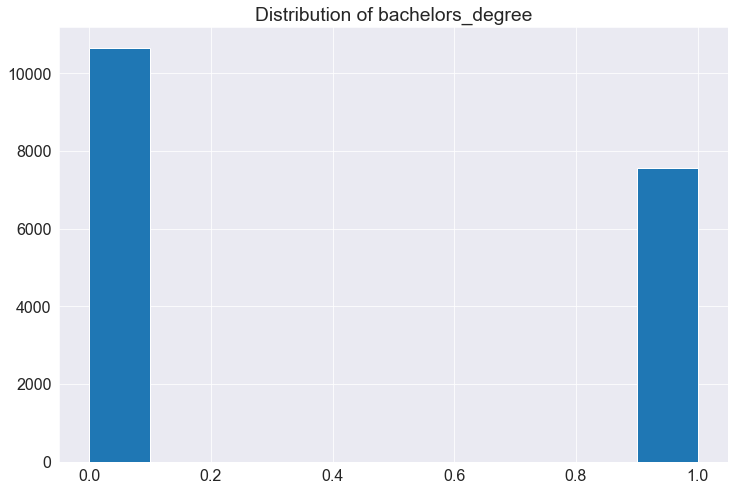

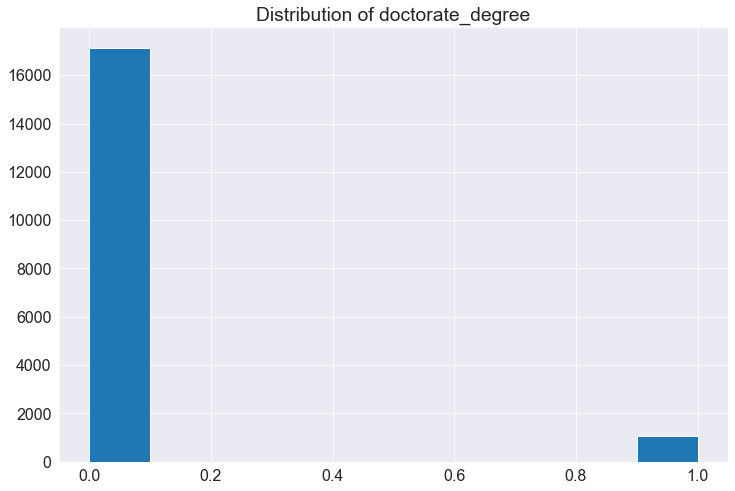

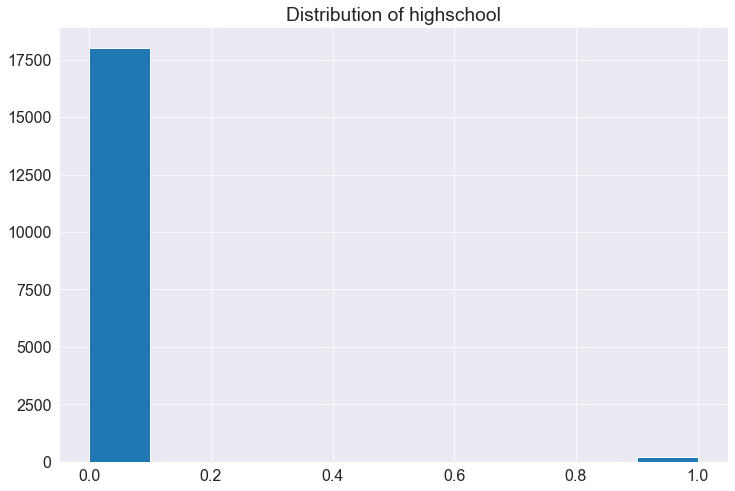

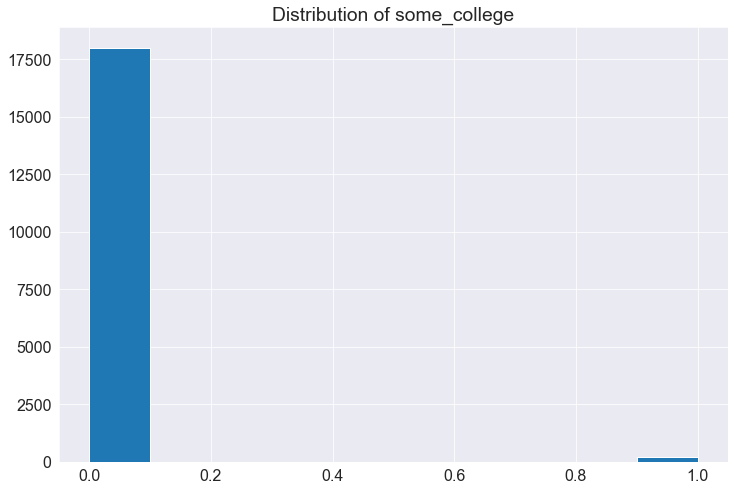

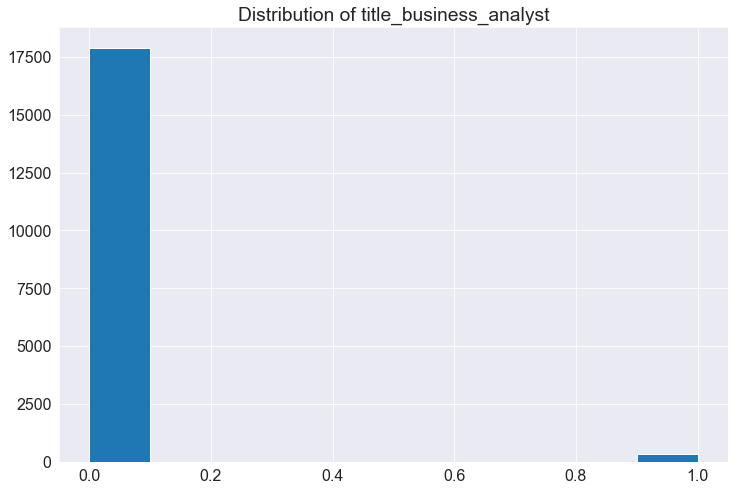

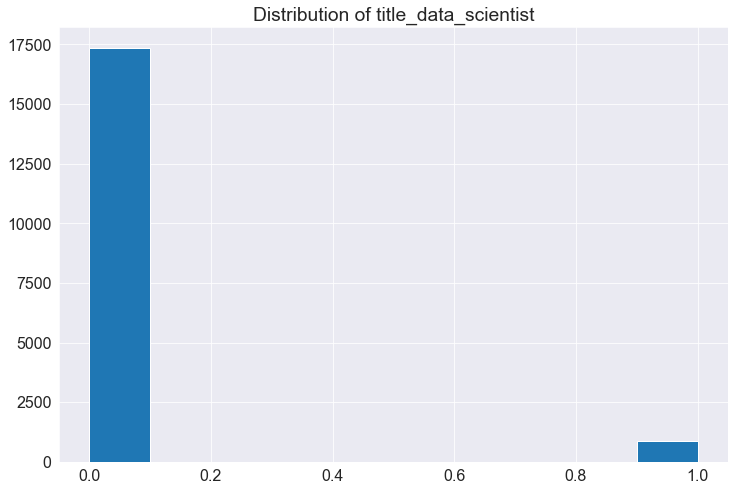

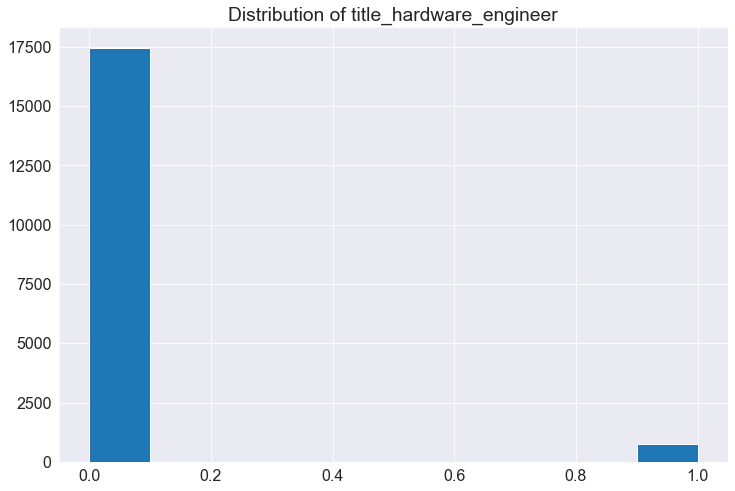

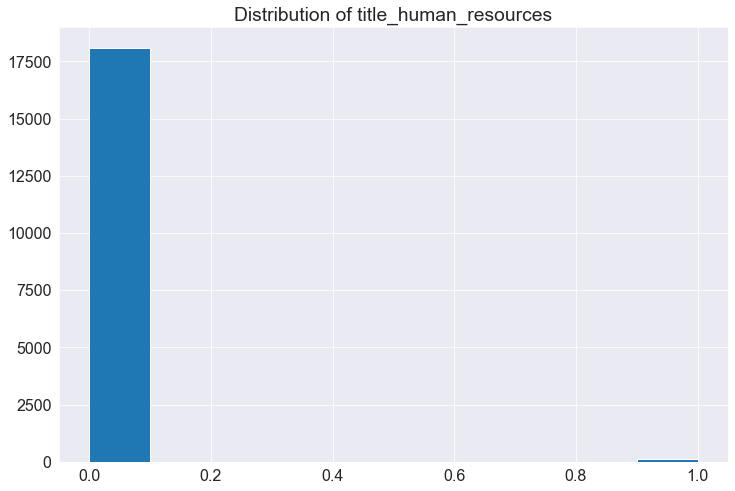

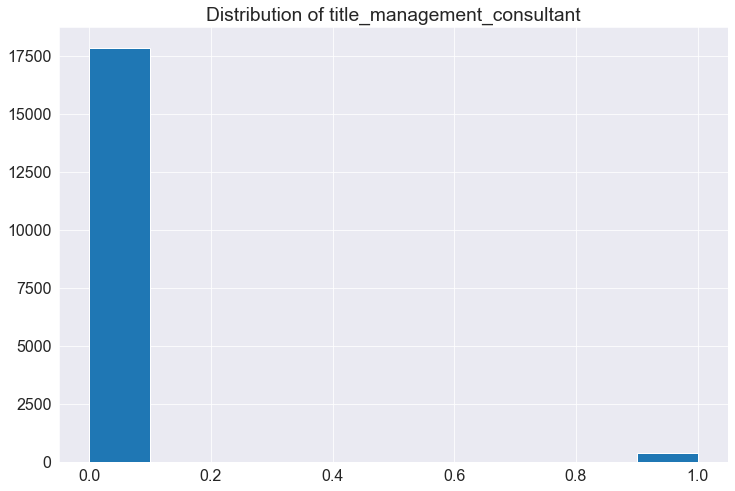

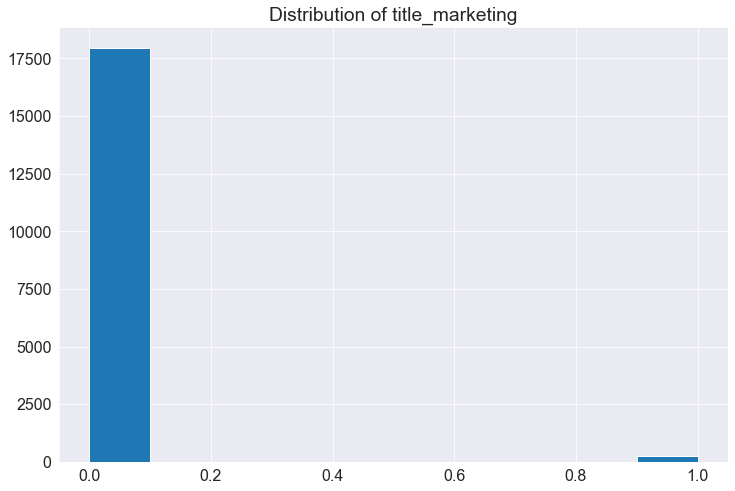

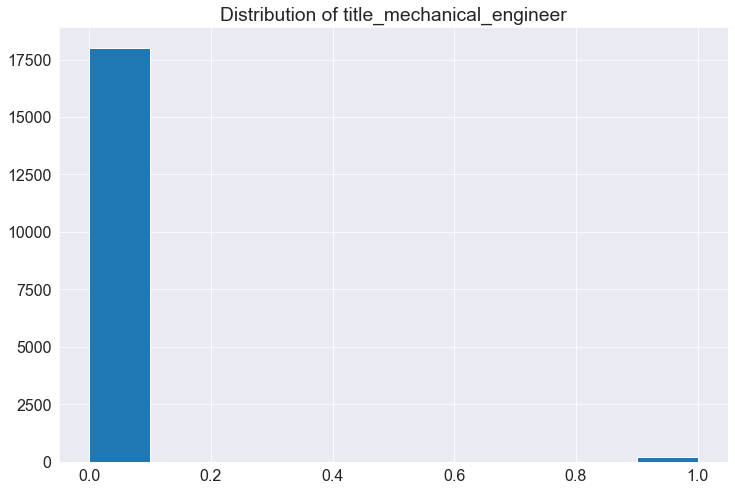

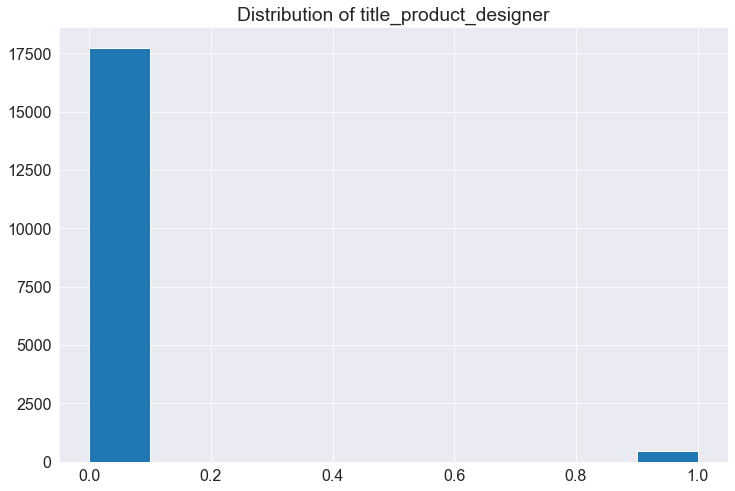

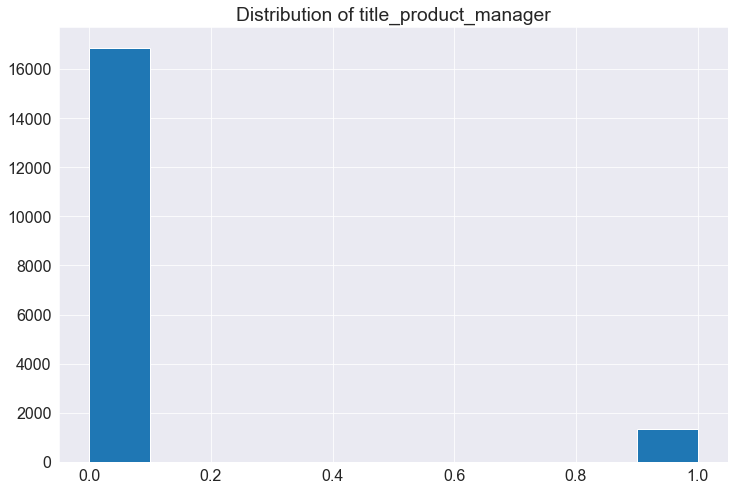

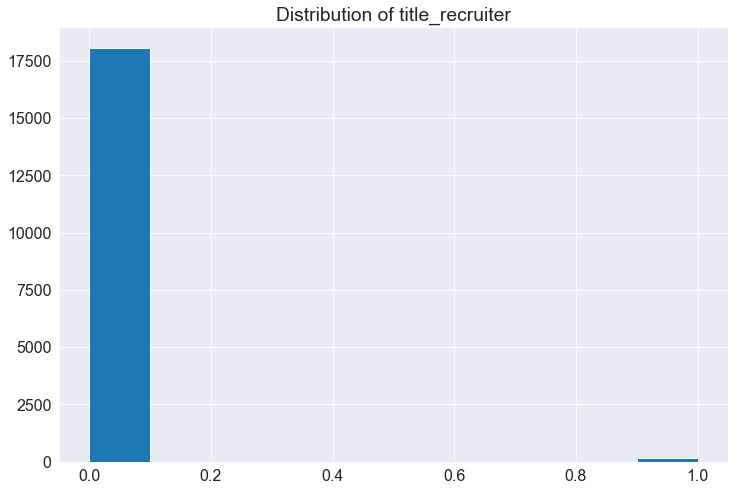

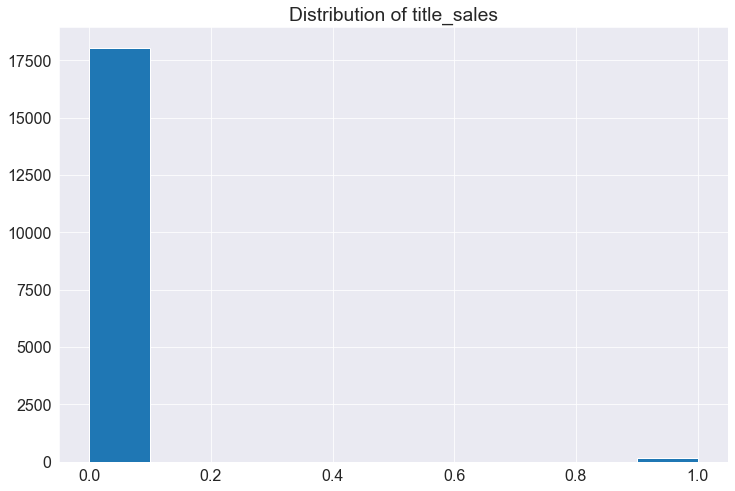

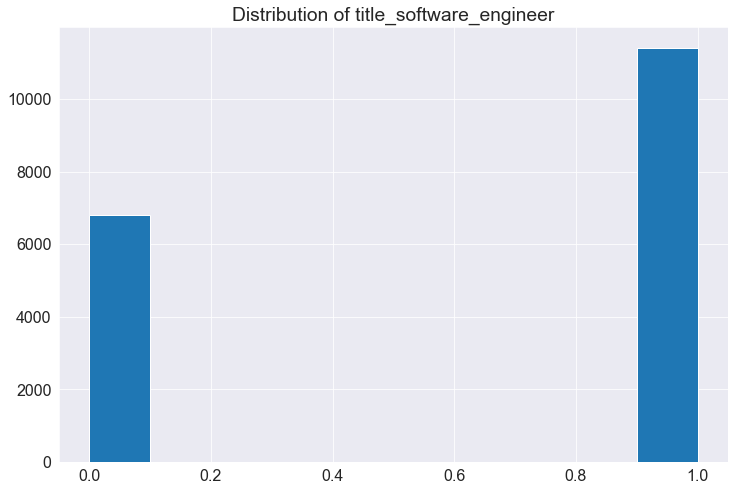

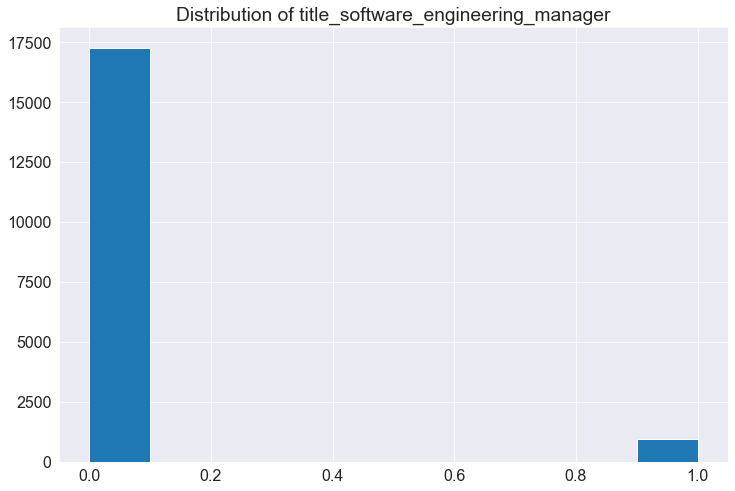

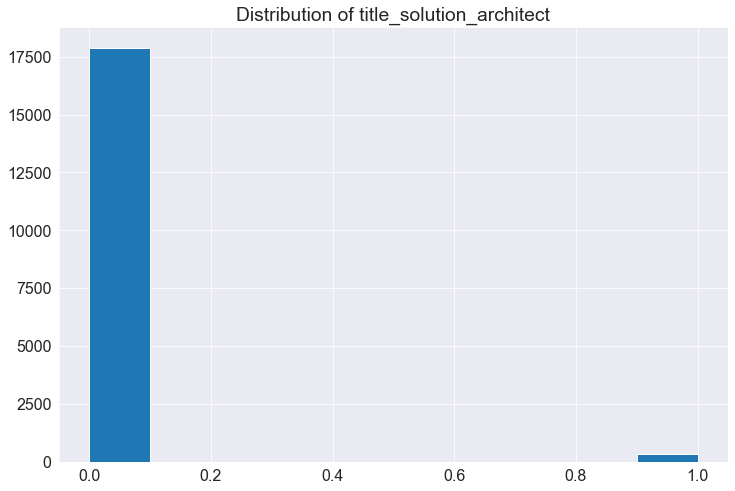

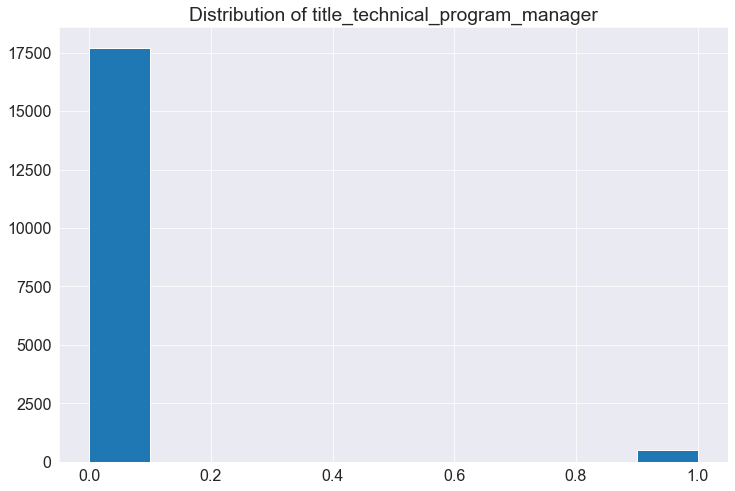

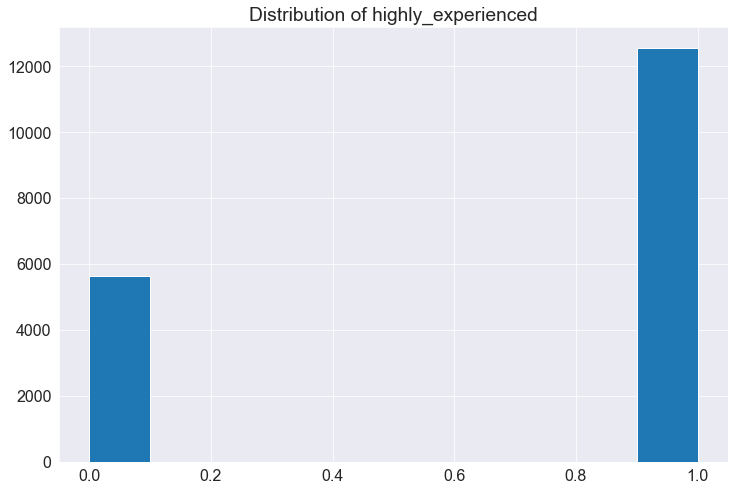

In [13]:
plot_hist(train,col_list)

**Takeaways**

### Bivariate exploration

### Multivariate exploration